# PNDM Prediction

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has Permanent Neonatal Diabetes Mellitus (PNDM).

We're going to take the following approach:

1. Problem definition
2. Data
3. Evaluation
4. Modelling

## Problem Definition

Predicting if a patient has a PNDM or not by using given clinical parameters is a binary classification problem.

## Data

The sample dataset is taken from [Kaggle](https://www.kaggle.com/datasets/slmsshk/pndm-prediction-dataset). The dataset has 7 features to be used predicting the label which is PNDM columns in the dataset. You can see the data dictionary [here](./Data/README.md).

## Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

⚠️ **Note:** Due to the nature of experimentation, the evaluation metric may change over time.

## Import Libraries

We're going to use:
- [pandas](https://pandas.pydata.org/) for data analysis.
- [NumPy](https://numpy.org/) for numerical operations.
- [Matplotlib](https://matplotlib.org/) / [seaborn](https://seaborn.pydata.org/) for plotting or data visualization.
- [Scikit-Learn](https://scikit-learn.org/stable/) for machine learning modelling and evaluation.

In [50]:
# Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as nb
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('ticks')
# we want our plots to appear inside the notebook
%matplotlib inline

# Linear Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Non-linear Models from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


# Ensemble Models from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import auc, roc_auc_score, roc_curve

## Load Data

In [8]:
df = pd.read_csv("Data/PNDB.csv")
df.shape # (rows, columns)

(100000, 8)

## Data Exploration

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [9]:
df.head()

,Age,HbA1c,Genetic Info,Family History,Birth Weight,Developmental Delay,Insulin Level,PNDM
0,3,4.840927,Mutation,Yes,3.128268,No,5.585608,0
1,3,5.694742,Mutation,No,2.059342,No,3.141359,1
2,7,6.843595,No mutation,No,2.718667,Yes,4.639313,0
3,2,6.480186,No mutation,No,3.087017,No,6.217178,0
4,4,7.052861,Mutation,No,3.481472,No,3.368892,0


In [42]:
# Let's check if the dataset is balanced of not
df['PNDM'].value_counts()

0    95178
1     4822
Name: PNDM, dtype: int64

<AxesSubplot: >

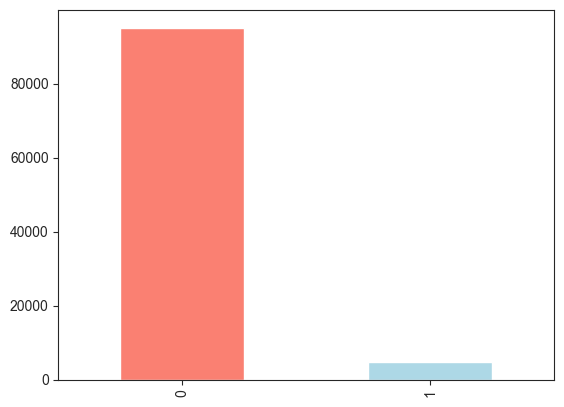

In [44]:
df['PNDM'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])

⚠️ It can be easily observed that the number of datapoints that are labeled as Not PNDM is much higher than the datapoints that are labeled as PNDM. Which means that the sample dataset we have is in highly imbalanced state. 
> When we try to use a usual classifier to classify an imbalanced dataset, the model favors the majority class due to its larger volume presence. 

That's why, we need to apply proper technique to handle this situation.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  100000 non-null  int64  
 1   HbA1c                100000 non-null  float64
 2   Genetic Info         100000 non-null  object 
 3   Family History       100000 non-null  object 
 4   Birth Weight         100000 non-null  float64
 5   Developmental Delay  100000 non-null  object 
 6   Insulin Level        100000 non-null  float64
 7   PNDM                 100000 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 6.1+ MB


In [17]:
df.isna().sum()

Age                    0
HbA1c                  0
Genetic Info           0
Family History         0
Birth Weight           0
Developmental Delay    0
Insulin Level          0
PNDM                   0
dtype: int64

✍🏼 As you can see on the above table, there is no null values in any of the columns.

In [28]:
df.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  100000 non-null  int64  
 1   HbA1c                100000 non-null  float64
 2   Genetic Info         100000 non-null  object 
 3   Family History       100000 non-null  object 
 4   Birth Weight         100000 non-null  float64
 5   Developmental Delay  100000 non-null  object 
 6   Insulin Level        100000 non-null  float64
 7   PNDM                 100000 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 6.9+ MB


✍🏼 The dataset does not contain any duplicated data points.

In [20]:
df.describe(include='all')

,Age,HbA1c,Genetic Info,Family History,Birth Weight,Developmental Delay,Insulin Level,PNDM
count,100000.000000,100000.000000,100000,100000,100000.000000,100000,100000.000000,100000.000000
unique,NaN,NaN,2,2,NaN,2,NaN,NaN
top,NaN,NaN,No mutation,No,NaN,No,NaN,NaN
freq,NaN,NaN,79992,90024,NaN,85101,NaN,NaN
mean,6.000500,6.996700,NaN,NaN,2.801585,NaN,5.003078,0.048220
std,3.166048,0.998358,NaN,NaN,0.500464,NaN,1.992177,0.214232
min,1.000000,2.830618,NaN,NaN,0.427123,NaN,-3.242078,0.000000
25%,3.000000,6.323205,NaN,NaN,2.463519,NaN,3.661212,0.000000
50%,6.000000,6.996069,NaN,NaN,2.800933,NaN,5.002304,0.000000
75%,9.000000,7.670997,NaN,NaN,3.139870,NaN,6.348078,0.000000


Text(0.5, 1.0, 'PNDM Frequency for Genetic Info')

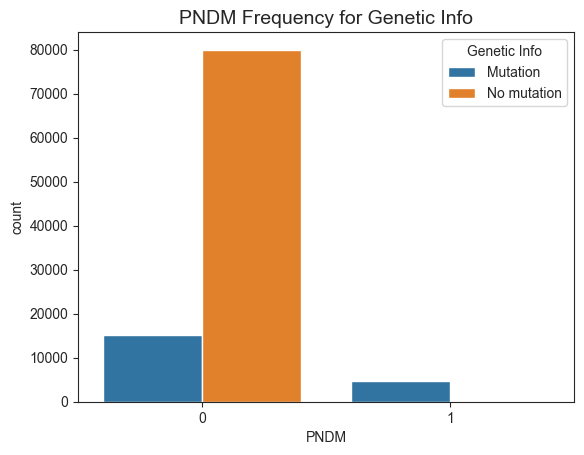

In [45]:
sb.countplot(data=df, x='PNDM', hue='Genetic Info')
plt.title('PNDM Frequency for Genetic Info', fontsize=14)

Text(0.5, 1.0, 'PNDM Frequency for Family History')

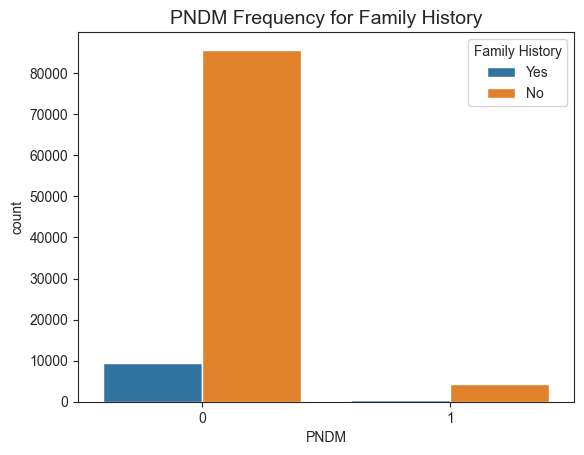

In [46]:
sb.countplot(data=df, x='PNDM', hue='Family History')
plt.title('PNDM Frequency for Family History', fontsize=14)

Text(0.5, 1.0, 'PNDM Frequency for Developmental Delay')

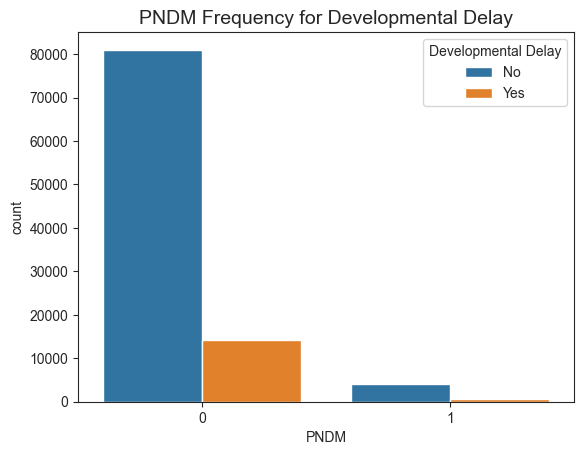

In [47]:
sb.countplot(data=df, x='PNDM', hue='Developmental Delay')
plt.title('PNDM Frequency for Developmental Delay', fontsize=14)

<module 'matplotlib.pyplot' from '/opt/anaconda3/envs/py3-TF2.0/lib/python3.10/site-packages/matplotlib/pyplot.py'>

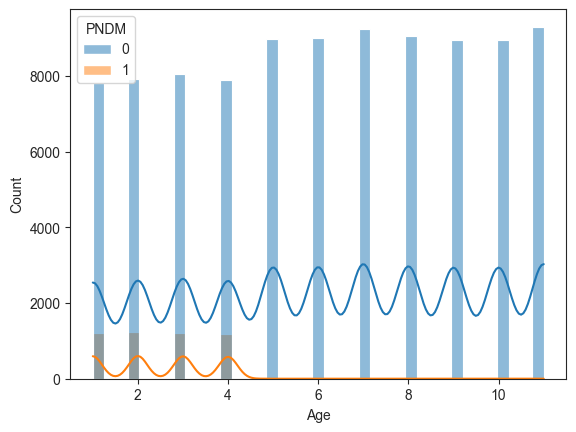

In [48]:
sb.histplot(data=df, x='Age', kde=True, hue='PNDM')
plt

<AxesSubplot: xlabel='HbA1c', ylabel='Count'>

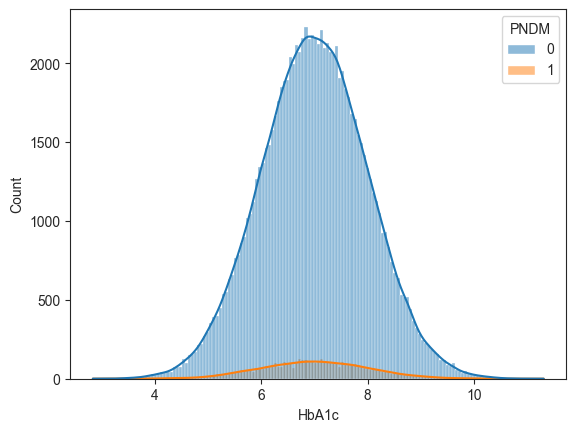

In [49]:
sb.histplot(data=df, x='HbA1c', hue='PNDM', kde=True)

<AxesSubplot: xlabel='Birth Weight', ylabel='Count'>

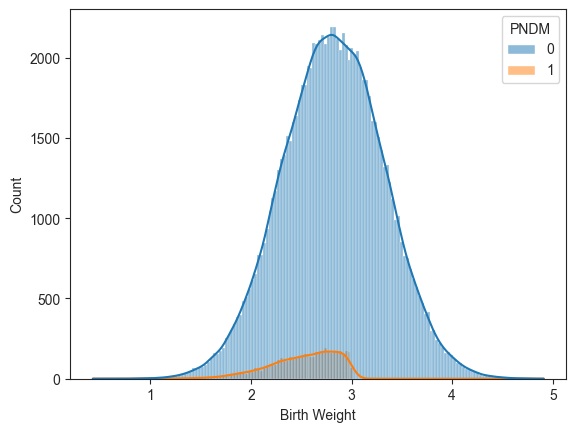

In [52]:
sb.histplot(data=df, x='Birth Weight', hue='PNDM', kde=True)

✍🏼 We might say that, as per the collected data, if a person's birth weight is more the 3 kg, it's highly unlikely ot have PNDM for that person.

<AxesSubplot: xlabel='Insulin Level', ylabel='Count'>

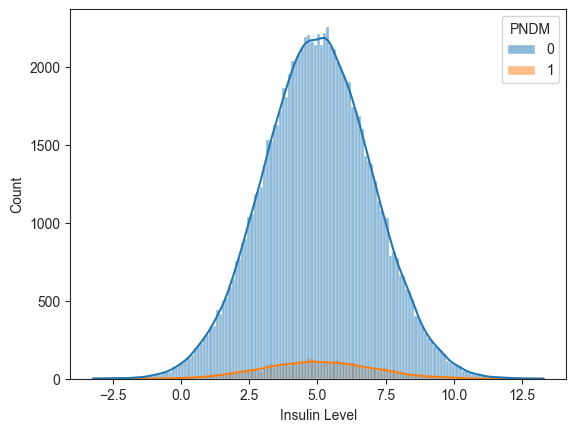

In [53]:
sb.histplot(data=df, x='Insulin Level', hue='PNDM', kde=True)

## Modeling